# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 14

## Problem 1a

First let's set things up for business. 

In [2]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

We are supposed to use  **ipmag.igrf()** to calculate the inclination values in Sicily at a latitude of 38$^{\circ}$ and  longitude of 14$^{\circ}$E from 1600 to 1945.  

In [3]:
help(ipmag.igrf)

Help on function igrf in module pmagpy.ipmag:

igrf(input_list, mod='', ghfile='')
    Determine Declination, Inclination and Intensity from the IGRF model.
    (http://www.ngdc.noaa.gov/IAGA/vmod/igrf.html)
    
    Parameters
    ----------
    input_list : list with format [Date, Altitude, Latitude, Longitude]
        date must be in decimal year format XXXX.XXXX (A.D.)
    mod :  desired model
        "" : Use the IGRF
        custom : use values supplied in ghfile
        or choose from this list
        ['arch3k','cals3k','pfm9k','hfm10k','cals10k.2','cals10k.1b']
        where:
            arch3k (Korte et al., 2009)
            cals3k (Korte and Constable, 2011)
            cals10k.1b (Korte et al., 2011)
            pfm9k  (Nilsson et al., 2014)
            hfm10k is the hfm.OL1.A1 of Constable et al. (2016)
            cals10k.2 (Constable et al., 2016)
            the first four of these models, are constrained to agree
            with gufm1 (Jackson et al., 2000) for the p

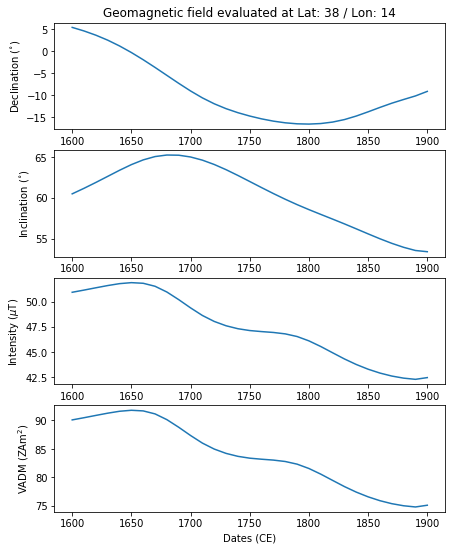

In [11]:
# make a list of desired dates
dates=range(1600,1910,10) # list of dates 10 year increments
mod = 'cals10k_2' # choose the  most recent model
lat,lon,alt=38,14,0 #  latitude, longitude and alitude for sicily
Vecs=[] # list for Dec,Inc,Int outputs
for date in dates: # step through the dates
    Vecs.append(ipmag.igrf([date,alt,lat,lon],mod=mod)) # append to list
vector_df = pd.DataFrame(Vecs)   # make it into a Pandas dataframe
vector_df.columns=['dec','inc','int']
vector_df['vadms']=pmag.b_vdm(vector_df.int.values*1e-9, lat) # calculate the VADMs
vector_df['dec_adj']=vector_df['dec'] 
vector_df.loc[vector_df.dec>180,['dec_adj']]=vector_df.dec-360 # adjust declinations to be -180 => 180
fig=plt.figure(1,figsize=(7,9)) # set up the figure
fig.add_subplot(411) # make 4 rows of plots, this is the first
plt.plot(dates,vector_df.dec_adj) # plot the adjusted declinations
plt.ylabel('Declination ($^{\circ}$)')
plt.title('Geomagnetic field evaluated at Lat: '+str(lat)+' / Lon: '+str(lon))
fig.add_subplot(412) # this is the second
plt.plot(dates,vector_df.inc) # plot  the inclinations
plt.ylabel('Inclination ($^{\circ}$)')
fig.add_subplot(413)
plt.plot(dates,vector_df.int*1e-3) # plot the intensites (in uT instead of nT)
plt.ylabel('Intensity ($\mu$T)')
fig.add_subplot(414) # plot the VADMs 
plt.plot(dates,vector_df.vadms*1e-21) # plot as ZAm^2
plt.ylabel('VADM (ZAm$^2$)')
plt.xlabel('Dates (CE)');


## Problem 1b

We need to read in the data from geomagia\_sel.txt.  Take  a peak and see that it is a comma delimited file with a header in the second line. We  read the data in with pandas. 

In [12]:
geomagia=pd.read_csv('Chapter_14/geomagia_sel.txt',header=1)
geomagia.head()

,Age[yr.AD],Sigma-ve[yr.],Sigma+ve[yr.],SigmaAgeID,N_Ba,n_Ba[meas.],n_Ba[acc.],Ba[microT],SigmaBa[microT],VDM[E22_AmE2],...,SpecTypeID,RefID,CompilationID,UploadMonth,UploadYear,Uploader,Editor,LastEditDate,C14ID,UID
0,1607,-9999,-9999,1,-999,-999,-999,-999.0,-999.0,-999.00,...,3,36,1005,-999,2009,Fabio Donadini,Maxwell Brown,24/07/2017,-1,857
1,1610,10,10,1,-999,-999,-999,-999.0,-999.0,-999.00,...,0,259,1001,-999,2009,Fabio Donadini,-999,-999,-1,5666
2,1610,-9999,-9999,1,1,-999,5,42.1,3.2,6.74,...,3,36,1001;1006;1010,-999,2007,Fabio Donadini,Maxwell Brown,24/07/2017,-1,858
3,1610,5,5,1,1,-999,4,40.5,8.1,-999.00,...,1,57,1001;1006;1010;1011,-999,2007,Fabio Donadini,-999,-999,-1,1403
4,1614,-9999,-9999,1,1,-999,5,40.8,3.2,-999.00,...,3,36,1001;1006;1010,-999,2007,Fabio Donadini,Maxwell Brown,24/07/2017,-1,836


In [13]:
geomagia_incs=geomagia[geomagia['Inc[deg.]']>-90]

In [14]:
geomagia_incs['Inc[deg.]']

0     62.8
1     60.0
2     65.1
5     65.0
6     61.5
7     61.6
9     61.4
10    57.5
11    62.2
12    57.3
13    60.7
14    62.5
15    60.4
17    61.8
18    63.3
19    64.0
20    65.4
21    64.1
22    57.7
23    54.2
24    54.2
25    56.6
26    58.3
28    56.1
29    57.9
31    53.2
32    54.8
35    55.7
37    51.5
38    52.0
42    50.5
43    49.8
44    49.8
46    51.7
48    51.3
50    50.7
51    49.0
52    51.6
53    52.3
56    50.9
59    49.0
Name: Inc[deg.], dtype: float64

Let's replot the GUFM data and decorate the plot with the geomagia data.

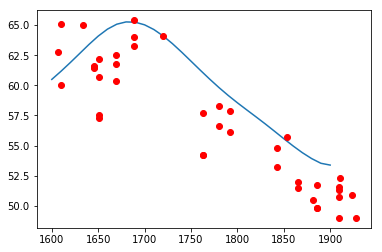

In [16]:
plt.plot(dates,vector_df.inc)
plt.plot(geomagia_incs['Age[yr.AD]'],geomagia_incs['Inc[deg.]'],'ro');

## Problem 1c

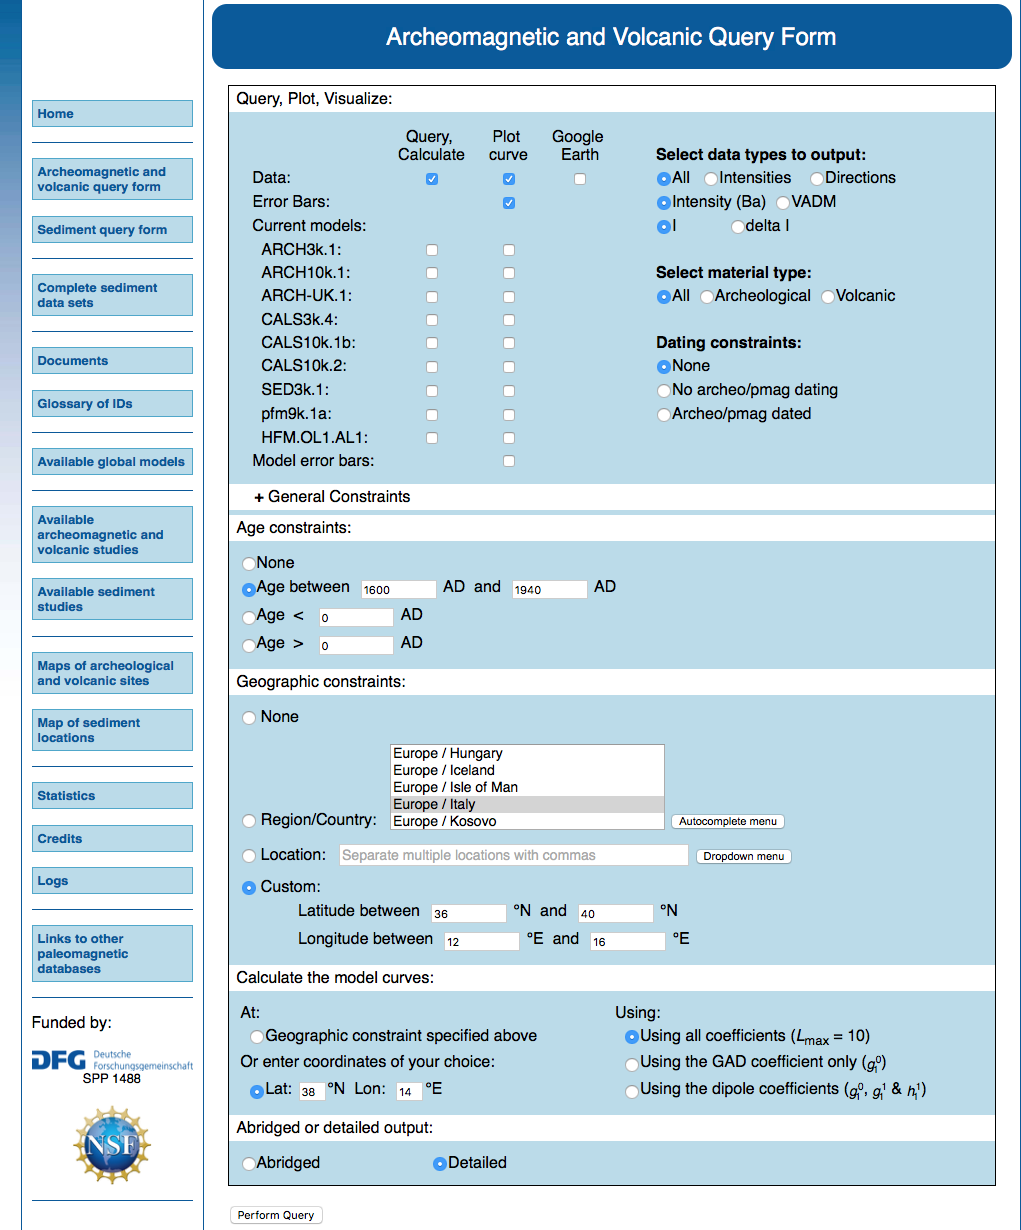

In [18]:
Image(filename="geomagia_screenshot.png")

I clicked on the 'Perform Query' button and scrolled down to the References part:  

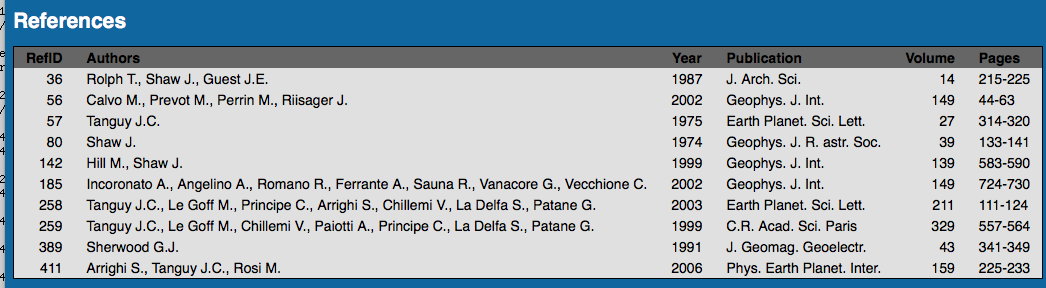

In [44]:
Image(filename="geomagia_refs.png")

Here is the original paper to see whether the samples were demagnetized properly, etc.  So I did that.  here is the pdf: 
http://ac.els-cdn.com/0305440387900082/1-s2.0-0305440387900082-main.pdf?_tid=6f840d8c-c90e-11e4-a1c8-00000aacb360&acdnat=1426202636_67453570f83c4126d6c152fbb69fd35d

The method used to determine the direction was AF demagnetization in 5mT steps to 50 mT (not very high) and averaged  the data from each specimen with Fisher statistics, apparently after looking at orthogonal plots to determine the stable portion of each demag experiment.   (This is of course not the way we do things nowadays.    One should use the principal component technique by Kirschvink (1980).)   After getting a direction from all the samples, they averaged data by flow, also using Fisher statistics.    

Any way, you get the idea.  This procedure would be done for each reference to really assess the data quality.  


Now let's do the equal area plot using the well worn **ipmag** functions (from Chapter 2).

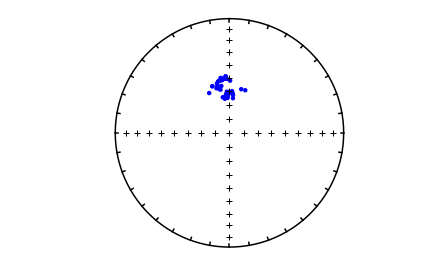

In [19]:
ipmag.plot_net(1) # make an equal angle net
ipmag.plot_di(geomagia_incs['Dec[deg.]'].values,geomagia_incs['Inc[deg.]'].values,color='blue') # put on the dots

So.. The data fall into two clumps.  Is this because of secular variation?  or is there tilting?  Or temporal aliasing?  Hmmm.  

## Problem 2a

To make this problem easier, I saved the PINT08.xls as a text file.  We can read it in with read_csv and find out what the columns are:

In [20]:
pint=pd.read_excel('Chapter_14/PINT.xls')
pint.columns

Index(['Data', 'Ref', 'IDENT', 'SLAT', 'SLONG', 'AGE', 'DAGE', 'AgeMtd',
       'Continent', 'Country', 'IntM', 'P', 'Ndir', 'INC', 'DEC', 'k', 'a95',
       'Nint', 'F', 'DF', 'DF%', 'VDM/VADM', 'GROUP', 'TYPE', 'FORM',
       'ROCKMAG', 'COMMENTS', 'LOCATION NAME'],
      dtype='object')

Before we do anything else, let's clean out the records with no VDM/VADM data: 

In [21]:
pint=pint.dropna(subset=['VDM/VADM'])
pint['VDM/VADM'].head()

0    2.3
1    6.9
2    5.7
3    5.2
4    2.7
Name: VDM/VADM, dtype: float64

To filter by age, we use the 'AGE' column, and by method, the 'IntM' column. First let's do age:  

In [22]:
pint_last_10=pint[pint.AGE <10]
pint_last_10.AGE.head()

0    1.80
1    1.00
2    2.60
4    4.45
5    4.45
Name: AGE, dtype: float64

Now let's fish out the 'T+' and 'S' methods separately.  

In [23]:
T_plus=pint_last_10[pint_last_10.IntM.str.contains('T+')]
T_plus.IntM.unique()


array(['T-', 'T+', 'ST', 'Tv', 'LTD-DHT-S', 'LTD-T+', 'T+Tv ', 'WT+',
       'MSPDpWT+', 'WBT+'], dtype=object)

For some reason this is including other results as well (T- and LTD-DHT-S), so some more filtering: 

In [24]:
T_plus=T_plus[T_plus.IntM.str.contains('T-')==False]
T_plus.IntM.unique()

array(['T+', 'ST', 'Tv', 'LTD-T+', 'T+Tv ', 'WT+', 'MSPDpWT+', 'WBT+'], dtype=object)

OK that did it.  And now for the Shaw method data: 

In [25]:
Shaw=pint_last_10[pint_last_10.IntM.str.contains('S')]
Shaw.IntM.unique()



array(['S', 'ST', 'LTD-DHT-S', 'MSPDp', 'MSPDpWT+', 'MSPDpW'], dtype=object)

Oops - there are a lot of 'MSPD' data which are multi-specimen data and not Shaw method data.  But the 'LTD-DHT-S' method is just a variant of the Shaw method (with low temperature treatment).  So some more cleaning: 

In [26]:
Shaw=Shaw[Shaw.IntM.str.contains('MSPD')==False]
Shaw.IntM.unique()



array(['S', 'ST', 'LTD-DHT-S'], dtype=object)

Now we can plot the two data sets versus age:

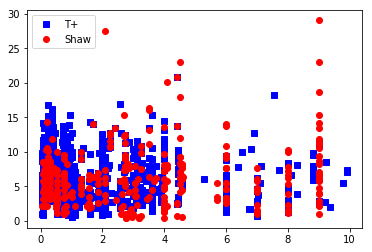

In [27]:

plt.plot(T_plus['AGE'],T_plus['VDM/VADM'],'bs',label='T+')
plt.plot(Shaw['AGE'],Shaw['VDM/VADM'],'ro',label='Shaw')
plt.legend();

The Shaw data seem to be more scattered with higher values for the same ages.... 

## Problem 3

I went to the website for the paper Lawrence et al. (2009) here: http://earthref.org/MagIC/doi/10.1029/2008GC002072
and clicked on the icon under the heading 'Download'. This downloaded a text file which I unpacked with **Pmag GUI**.  Now I want to read in the data from the **sites.txt** file.  From the documentation in **_PmagPy_nb.ipynb**, I know that MagIC files are tab delimited and the column names are in the second line, so this should do the trick:

In [28]:
site_means=pd.read_csv('Chapter_14/lawrence09/sites.txt','\t',header=1)
site_means.head()

,site,location,samples,specimens,age,age_sigma,age_unit,dir_alpha95,dir_comp_name,dir_dec,...,vadm_n_samples,vadm_sigma,vdm,vdm_n_samples,vdm_sigma,vgp_dm,vgp_dp,vgp_lat,vgp_lon,vgp_n_samples
0,mc01,McMurdo,NaN,mc01b : mc01c : mc01d : mc01e : mc01f : mc01h:...,1.180,0.005,Ma,4.2,A,258.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mc01,McMurdo,mc01b : mc01d : mc01g:mc01a,mc01b : mc01d : mc01g:mc01a,1.180,0.005,Ma,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mc02,McMurdo,NaN,mc02b : mc02c : mc02f : mc02g : mc02h:mc02a,0.330,0.010,Ma,2.1,A,328.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mc03,McMurdo,NaN,mc03b : mc03c : mc03d : mc03f : mc03h:mc03a,0.348,0.004,Ma,2.3,A,352.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mc04,McMurdo,NaN,mc04b : mc04e : mc04f : mc04g:mc04a,0.340,0.003,Ma,4.6,A,352.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To plot them, I first fish out the directions that are not blank (some of the records are just intensity values). 

In [29]:
site_means=site_means.dropna(subset = ['dir_dec'])
site_means=site_means.dropna(subset = ['dir_inc'])

Now plot the net with ipmag.plot_net  and the directions with ipmag.plot_di. But first I set up a figure object.  

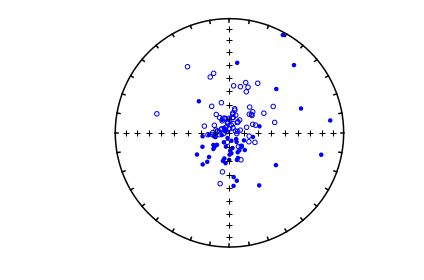

In [30]:
plt.figure(num=1)
ipmag.plot_net(1)
ipmag.plot_di(site_means['dir_dec'].values,site_means['dir_inc'].values,color='blue')

Now for the VGPs from the same records (vgp\_lat and vgp\_lon are the keys).  First we have to take the antipodes of the  VGPs  and fish out the normal (positive VGP latitudes) and reverse data (negative VGP latitudes).   

In [31]:
help(ipmag.vgp_calc)

Help on function vgp_calc in module pmagpy.ipmag:

vgp_calc(dataframe, tilt_correction='yes', site_lon='site_lon', site_lat='site_lat', dec_is='dec_is', inc_is='inc_is', dec_tc='dec_tc', inc_tc='inc_tc')
    This function calculates paleomagnetic poles using directional data and site
    location data within a pandas.DataFrame. The function adds the columns
    'paleolatitude', 'vgp_lat', 'vgp_lon', 'vgp_lat_rev', and 'vgp_lon_rev'
    to the dataframe. The '_rev' columns allow for subsequent choice as to which
    polarity will be used for the VGPs.
    
    Parameters
    -----------
    dataframe : the name of the pandas.DataFrame containing the data
    tilt-correction : 'yes' is the default and uses tilt-corrected data (dec_tc, inc_tc), 'no' uses data that is not tilt-corrected and is in geographic coordinates
    dataframe['site_lat'] : the name of the Dataframe column containing the latitude of the site
    dataframe['site_lon'] : the name of the Dataframe column containing the 

So we are almost there.  We just have to tell **ipmag.vgp_calc( )** which column is which set the **tilt_correction** keyword to **no**.   

In [32]:
vgps=ipmag.vgp_calc(site_means,tilt_correction='no',site_lon='lon',site_lat='lat',dec_is='dir_dec',inc_is='dir_inc')
vgps.columns

Index(['site', 'location', 'samples', 'specimens', 'age', 'age_sigma',
       'age_unit', 'dir_alpha95', 'dir_comp_name', 'dir_dec', 'dir_inc',
       'dir_k', 'dir_n_samples', 'dir_n_specimens_lines',
       'dir_n_specimens_planes', 'dir_nrm_origin', 'dir_polarity', 'dir_r',
       'dir_tilt_correction', 'lat', 'lon', 'geologic_classes',
       'geologic_types', 'lithologies', 'analysts', 'criteria', 'description',
       'software_packages', 'int_abs', 'int_abs_sigma', 'int_abs_sigma_perc',
       'int_n_samples', 'citations', 'method_codes', 'result_quality',
       'result_type', 'vadm', 'vadm_n_samples', 'vadm_sigma', 'vdm',
       'vdm_n_samples', 'vdm_sigma', 'vgp_dm', 'vgp_dp', 'vgp_lat', 'vgp_lon',
       'vgp_n_samples', 'paleolatitude', 'vgp_lat_rev', 'vgp_lon_rev'],
      dtype='object')

Now we have fun with **ipmag.plot_vgp( )** and **matplotlib**'s **Basemap** module.  **ipmag.plot_vgp( )** help page will walk us through this.  

In [33]:
help(ipmag.plot_vgp)

Help on function plot_vgp in module pmagpy.ipmag:

plot_vgp(mapname, vgp_lon=None, vgp_lat=None, di_block=None, label='', color='k', marker='o', markersize=20, legend='no')
    This function plots a paleomagnetic pole on whatever current map projection
    has been set using the basemap plotting library.
    
    Before this function is called, a plot needs to be initialized with code
    that looks something like:
    >from mpl_toolkits.basemap import Basemap
    >mapname = Basemap(projection='ortho',lat_0=35,lon_0=200)
    >plt.figure(figsize=(6, 6))
    >mapname.drawcoastlines(linewidth=0.25)
    >mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
    >mapname.drawmapboundary(fill_color='white')
    >mapname.drawmeridians(np.arange(0,360,30))
    >mapname.drawparallels(np.arange(-90,90,30))
    
    Required Parameters
    -----------
    mapname : the name of the current map that has been developed using basemap
    plon : the longitude of the paleomagnetic pole bei

So... following the instructions we should make separate dataframes for the normal and reverse poles (so we can use different colors...).  Because these are young lava flows, I can assume that positive vgp latitudes are "normal". Note that this would not be true for very old rocks because of continental drift!   Also, I want the antipodes of the reverse poles! 

In [34]:
norms=vgps[vgps.vgp_lat>0] # assume positive latitudes are normal sites
revs=vgps[vgps.vgp_lat<=0]
revs['vgp_ant_lat']=-revs['vgp_lat']
revs['vgp_ant_lon']=(revs['vgp_lon']-180)%360

In [35]:
 from mpl_toolkits.basemap import Basemap

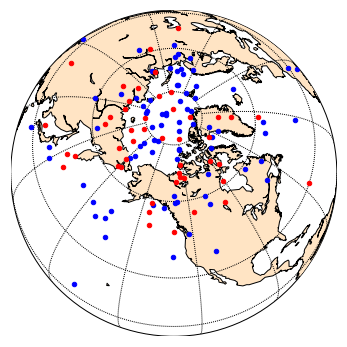

In [36]:
m=Basemap(projection='ortho',lat_0=70,lon_0=230,resolution='c')
plt.figure(num=2,figsize=(6,6))
m.drawcoastlines()
m.fillcontinents(color='bisque')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-60,90,30))
ipmag.plot_vgp(m,norms['vgp_lon'].tolist(),norms['vgp_lat'].tolist(),\
               color='b',label='normal VGPs')
ipmag.plot_vgp(m,revs['vgp_ant_lon'].tolist(),revs['vgp_ant_lat'].tolist(),\
               color='r',label='reverse VGPs')

## Problem 2c

In [95]:
VGPs=np.concatenate((norms[['vgp_lon','vgp_lat']].values,\
                     revs[['vgp_ant_lon','vgp_ant_lat']].values)).transpose()

In [84]:
def Scalc(vgps):
    N=len(vgps[1])
    colats=90.-vgps[1]
    Sp2=np.sum(colats**2)/(N-1.)
    return '%7.1f'%(np.sqrt(Sp2))

    

In [86]:
print (Scalc(VGPs))

   34.1


## Problem 2d

In [87]:
def Scalc_w_cutoff(vgps,c):
    N=len(vgps[1])
    colats=90.-vgps[1]
    Good=[]
    for i in range(N):
        if colats[i]<c:Good.append(colats[i])
    sel_colats=np.array(Good)
    Sp2=np.sum(sel_colats**2)/(N-1.)
    return '%7.1f'%(np.sqrt(Sp2))

In [89]:
for c in range(90,20,-5):
    print (c,Scalc_w_cutoff(VGPs,c))

90    34.1
85    32.4
80    30.8
75    29.4
70    28.7
65    27.4
60    26.3
55    25.8
50    22.9
45    21.8
40    18.9
35    17.5
30    13.4
25    11.5


Well the values of Sp with different cutoff values just look arbitrary to me.  How am I supposed to know what the cutoff should be? Seems like that question puts the cart before the horse. 

## Problem 2e

Ok.  now we repeat this with the data in Chapter_14/hawaii.txt

In [90]:
hw_site_means=pd.read_csv('Chapter_14/hawaii.txt','\t',header=0)
hw_site_means.head()

,age,age_pm,age_high,age_low,site_lat,site_lon,model_lat,model_lon,plate,nn,...,dec,inc,model_vgp_lat,model_vgp_lon,site,site_ID,location,psv10_location,reference,magic_method_code
0,0.184,0.003,999.0,999.0,20.075,204.150,20.021704,204.257442,PA,5,...,340.9,34.3,72.0,113.7,HW01,38,Hawaii,"Hawaii, USA",Brassert97,GM-KAR:LP-DC4:LP-DIR-T:LP-PI-ALT-PTRM:LP-PI-TR...
1,0.181,0.003,999.0,999.0,20.104,204.125,20.051574,204.230699,PA,8,...,343.9,31.8,74.5,106.4,HW02,39,Hawaii,"Hawaii, USA",Brassert97,GM-KAR:LP-DC4:LP-DIR-T:LP-PI-ALT-PTRM:LP-PI-TR...
2,0.254,0.012,999.0,999.0,20.117,204.121,20.043429,204.269321,PA,12,...,3.7,55.4,73.8,215.1,HW03,40,Hawaii,"Hawaii, USA",Brassert97,GM-KAR:LP-DC4:LP-DIR-T:LP-PI-ALT-PTRM:LP-PI-TR...
3,0.153,0.003,999.0,999.0,20.142,204.117,20.097684,204.206353,PA,14,...,6.4,32.7,83.5,314.0,HW04,41,Hawaii,"Hawaii, USA",Brassert97,GM-KAR:LP-DC4:LP-DIR-T:LP-PI-ALT-PTRM:LP-PI-TR...
4,0.382,0.016,999.0,999.0,20.150,204.105,20.039354,204.328050,PA,6,...,350.2,21.9,77.2,73.2,HW05,42,Hawaii,"Hawaii, USA",Brassert97,GM-KAR:LP-DC4:LP-DIR-T


In [ ]:
so it looks like the columns we want are model_vgp_lon and model_vgp_lat. 

In [98]:
hw_site_means['vgp_ant_lat']=-hw_site_means['model_vgp_lat']
hw_site_means['vgp_ant_lon']=hw_site_means['model_vgp_lon']-180.
hw_Norm_results=hw_site_means.loc[hw_site_means.model_vgp_lat>=0]
hw_Rev_results=hw_site_means.loc[hw_site_means.model_vgp_lat<0]
hw_VGPs=np.concatenate((hw_Norm_results[['model_vgp_lon','model_vgp_lat']].values,\
                     hw_Rev_results[['vgp_ant_lon','vgp_ant_lat']].values)).transpose()
print (Scalc(hw_VGPs))

   14.2


Wow. so there is a BIG latitudinal dependence.  Now let's calculate Model G for the latitudes at Hawaii and Antarctica.

In [100]:
def ModelG(lat):
    a,b=0.26,11.9
    S2=(a*lat)**2+b**2
    return np.sqrt(S2)

In [101]:
antarctica_lat=np.average(site_means['lat'])
hawaii_lat=np.average(hw_site_means['model_lat'])
print (antarctica_lat,ModelG(antarctica_lat))
print (hawaii_lat,ModelG(hawaii_lat))

-77.9466744361 23.5016221177
20.6104438681 13.0508938697


So the values we get are much larger than Model G.  But what about using a cutoff of, say 45$^{\circ}$?

In [103]:
print (Scalc_w_cutoff(VGPs,45))
print (Scalc_w_cutoff(hw_VGPs,45))

   21.8
   13.2


So, Model G works well for data with a 45$^{\circ}$ cutoff.  And now just to show off:

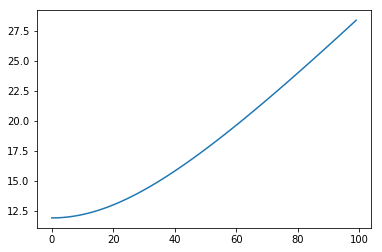

In [104]:
lats=range(100)
Ss=[]
for lat in lats:
    Ss.append(ModelG(lat))
plt.plot(lats,Ss);

## Problem 4a:

First we we will generate 100 directions from the program tk03.py at a latitude of 20$^{\circ}$.

In [53]:
!tk03.py -h


    NAME
        tk03.py

    DESCRIPTION
        generates set of vectors drawn from TK03.gad at given lat and
        rotated about vertical axis by given Dec 

    INPUT (COMMAND LINE ENTRY and interactive)
    OUTPUT
        dec,  inc, int   

    SYNTAX
        tk03.py [command line options] [> OutputFileName]

    OPTIONS
        -n N specify N, default is 100
        -d D specify mean Dec, default is 0
        -lat LAT specify latitude, default is 0
        -rev include reversals
        -t INT  truncates  intensities to >INT uT
        -G2 FRAC  specify average g_2^0 fraction (default is 0)
        -G3 FRAC  specify average g_3^0 fraction (default is 0)
    


In [105]:
!tk03.py -lat 20 >hawaii.tk03

In [106]:
!eqarea.py -f hawaii.tk03 -sav -fmt png

1  saved in  hawaii_eq.png


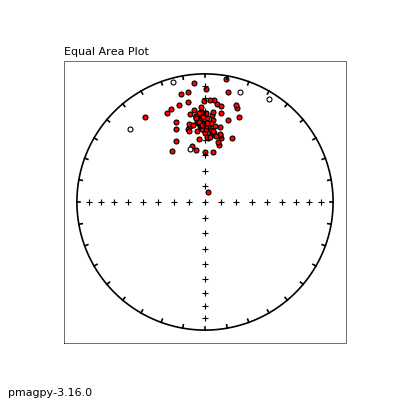

In [108]:
Image(filename='hawaii_eq.png')

## Problem 4b:

Let's find the IGRF value at lat=20, lon=-156.

In [109]:
d,i,f=ipmag.igrf([2010,0,20,-156])
print (d,i)

9.75366583461 36.6001896139


Now let's find the GAD inclination at this latitude with pmag.pinc

In [110]:
print (pmag.pinc(20))

36.0523887324


and rotate the hawaii.tk03 data to this expected GAD direction using di\_rot.py

In [111]:
!di_rot.py -h


    NAME
        di_rot.py

    DESCRIPTION
        rotates set of directions to new coordinate system

    SYNTAX
        di_rot.py [command line options]

    OPTIONS
        -h prints help message and quits
        -f specify input file, default is standard input
        -F specify output file, default is standard output
        -D D specify  Dec of new coordinate system, default is 0
        -I I specify  Inc of new coordinate system, default is 90
    INTPUT/OUTPUT
        dec  inc   [space delimited]  


    


In [112]:
!di_rot.py -D 0 -I 36 <hawaii.tk03>hawaii_rot.tk03

And plot them.

In [113]:
!eqarea.py -f hawaii_rot.tk03 -fmt png -sav

1  saved in  hawaii_rot_eq.png


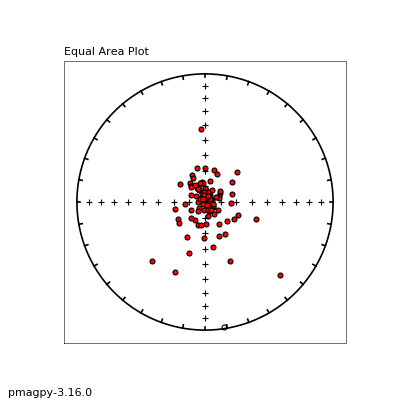

In [114]:
Image(filename='hawaii_rot_eq.png')

Now we do the same for the Hawaiian data we extracted from hawaii.txt.  But first we have to save them to a file. 

In [116]:
hw_DIs=np.array([hw_site_means['dec'].values,hw_site_means['inc'].values]).transpose()
np.savetxt('hawaii.di',hw_DIs)

In [117]:
!di_rot.py -D 0 -I 36 <hawaii.di>hawaii_rot.di

In [118]:
!eqarea.py -f hawaii_rot.di -fmt png -sav

1  saved in  hawaii_rot_eq.png


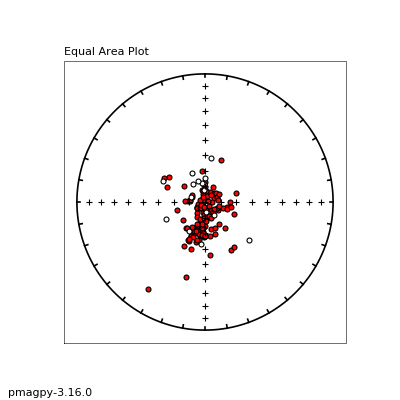

In [119]:
Image(filename='hawaii_rot_eq.png')

The data from Hawaii are dual polarity and apparantly have a different mean direction from the GAD field.  They also look stretched in a weird way and I'm beginning to think that some part of Hawaii is tilted....   Maybe a project for someone in here. 

## Problem 4c

And now let's calculate the eigenparameters for the Hawaii data set. 

In [120]:
!goprinc.py -f hawaii.di

0.93040     0.5    27.8 0.04814   197.5    61.1 0.02145    94.3     7.2 158


And bingo!  The average inclination is about 28$^{\circ}$, not 36!  This is what you would get if there is a non-zero g$^0_2$ term. 